# **Cybersecurity Intrusion Detection Dataset **

In [ ]:
# Install dependencies (if not already installed)
%pip install pandas matplotlib data-wrangler seaborn


In [23]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore
import warnings

warnings.filterwarnings('ignore')

# import the necessary libraries

# Optional: make plots display inside notebook
%matplotlib inline

In [ ]:
#  Load CSV file
df = pd.read_csv(r"C:\Conestoga Projects\Data Analysis\Project 1\.venv\Data\cybersecurity_intrusion_data.csv")

# Preview first rows
df.head()

In [ ]:
# Cleaning the Dataset
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

#Handling duplicates
df = df.drop_duplicates() 

# Handle missing values
# Example: fill numeric with median, categorical with "Unknown"
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna("Unknown")


#Standardize categorical text (remove spaces, title case)
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.title()


# Handle outliers (basic example: cap numeric values at 1st–99th percentile)
for col in num_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

#Final check
print("\n Cleaned Shape:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum()) 

#Save cleaned dataset
df.to_csv(r"C:\Conestoga Projects\Data Analysis\Project 1\.venv\Data\cybersecurity_intrusion_data_cleaned.csv", index=False)
print("\n Cleaned file saved!")

In [ ]:
# Basic Data Analysis
# Shape, summary statistics, and info
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())

In [ ]:
# Handle missing values
# Show count of missing values per column
df.isnull().sum()

# Check dataframs columns
print(df.columns)


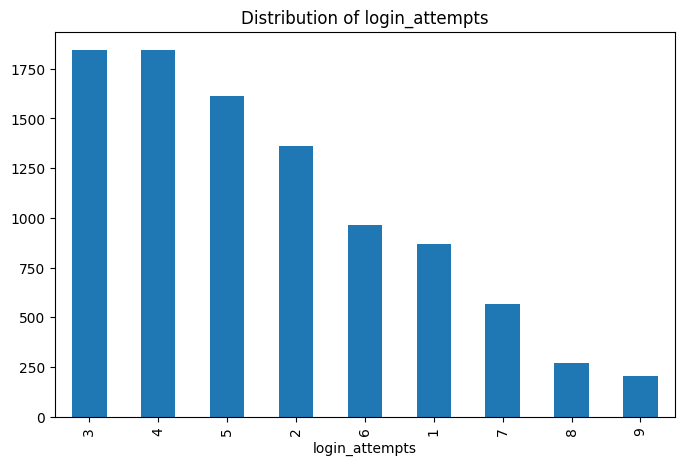

In [38]:
# Simple Visualization Example
# Replace 'column_name' with a real column from your CSV
from matplotlib import pyplot as plt


columns = ['login_attempts']

for col in columns:
    df[col].value_counts().plot(kind='bar', figsize=(8,5))
    plt.title(f"Distribution of {col}")
    plt.show()



In [ ]:
# Use Data Wrangler
# Data Wrangler can be launched from JupyterLab or VS Code
# In VS Code, right-click your dataframe (df) and select:
# "Open in Data Wrangler"

df
#Thats the end of it